In [314]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:15 http://security.ubuntu.com/ubu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [315]:
import time
 
from bs4 import BeautifulSoup
 
#driver = webdriver.Chrome()
driver.implicitly_wait(30)

In [316]:
import requests
import pandas as pd
from datetime import datetime
import ast
import time

In [317]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}

In [318]:
try:
    SCROLL_PAUSE_TIME = 3.5
    driver.get("https://www.kathimerini.gr/search/covid19/")
 
 
    last_height = driver.execute_script("return document.body.scrollHeight")
 
    while (last_height < 42000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height
 
 
 
finally:
#    driver.quit()
    print("OK")

height: 6370
height = 6370
OK


In [319]:
html = driver.page_source.encode('utf-8')
 
soup = BeautifulSoup(html, "html.parser")

In [320]:
response = requests.get("https://www.kathimerini.gr/search/covid19/", headers=headers)
 
doc = BeautifulSoup(response.text)

In [321]:
from selenium import webdriver
import time
 
url = "https://www.kathimerini.gr/search/covid19/"
 
 
driver.get(url)
html = driver.page_source.encode('utf-8')
page_num = 0
 
driver.find_element_by_css_selector('.css-17ovhjm.css-17ovhjm .qc-cmp2-footer .qc-cmp2-summary-buttons button:last-child').click()
 
 
while driver.find_elements_by_css_selector('.nx_loadmore'):
    driver.find_element_by_css_selector('.nx_loadmore').click()
    page_num += 1
    print("getting page number "+str(page_num))
    time.sleep(1)
 
html = driver.page_source.encode('utf-8')
doc = BeautifulSoup(html, "html.parser")

getting page number 1
getting page number 2


In [322]:
# Ξεκινάμε με μια άδεια λίστα
from datetime import datetime
import re as re
stories_list = []
stories = doc.find_all('article')
for story in stories:
    headline = story.find('h2')
    summary = story.find('p')
    link = story.a['href']
    releasedate = story.find('span', { 'class' : 'meta-date' })
    # Έχει η ιστορία summary?
    if summary:
        summary_text = summary.text
    else:
        summary_text = ''
        
        # Φτιάξε ένα λεξικό αν ΕΧΕΙ summary
    story_dict = {
            'headline': headline.text,
            'summary': summary_text,
            'link': link,
            'releasedate': releasedate.text
        }
     
    # Πρόσθεσε το λέξικο στη λίστα
    stories_list.append(story_dict)
 
print(stories_list)
 
# Τώρα που τελειώσαμε μετέτρεψε το σε CSV και αποθήκευσε το.
# Αν δεν χρησιμοποιήσετε το index=False, θα έχετε ένα άσχημο dataframe!
import pandas as pd
kathimerini = pd.DataFrame(stories_list)
 
kathimerini['releasedate'] = pd.to_datetime(kathimerini['releasedate'], format='%d.%m.%Y / %H:%M')
 
kathimerini.to_csv("kathimerini.csv", index=False)

[{'headline': 'Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατά της covid19 των εφήβων 12-15 ετών', 'summary': 'Θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών, έδωσε το Ανώτατο Συμβούλιο Υγείας του Βελγίου, προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωτα.', 'link': 'https://www.kathimerini.gr/world/561423979/velgio-thetiki-eisigisi-gia-ton-emvoliasmo-kata-tis-covid19-ton-efivon-12-15-eton/', 'releasedate': '06.07.2021 / 15:31'}, {'headline': 'Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,98% αποτελεσματικό έπειτα από 3 δόσεις', 'summary': 'Το Αμπντάλα, το ένα από τα υποψήφια εμβόλια κατά της COVID-19 που κατασκευάζονται στην Κούβα –και ένα από τα πρώτα που αναπτύχθηκαν στη Λατινική Αμερική–, έχει αποτελεσματικότητα 92,28% έναντι της νόσου, ανακοίνωσε χθες Δευτέρα το εργαστήριο που το δημιούργησε. ', 'link': 'https://www.kathimerini.gr/world/561406834/emvoliasmos-covid19-to-koyvaniko-ampntala-92-98-

In [323]:
kathimerini

,headline,summary,link,releasedate
0,Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...,Θετική εισήγηση για τον εμβολιασμό κατά της co...,https://www.kathimerini.gr/world/561423979/vel...,2021-07-06 15:31:00
1,"Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...","Το Αμπντάλα, το ένα από τα υποψήφια εμβόλια κα...",https://www.kathimerini.gr/world/561406834/emv...,2021-06-22 07:49:00
2,Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...,Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...,https://www.kathimerini.gr/society/561380464/p...,2021-05-28 21:54:00
3,Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...,Το «EU digital Covid certificate» θα εκδίδεται...,https://www.kathimerini.gr/society/561379552/p...,2021-05-28 12:25:00
4,Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...,Πέθανε από COVID19 ο παλαιός πρωταθλητής και «...,https://www.kathimerini.gr/society/561323353/v...,2021-04-08 17:05:00
5,Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...,Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...,https://www.kathimerini.gr/economy/561242983/e...,2021-01-27 10:49:00
6,Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...,Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...,https://www.kathimerini.gr/society/561141022/l...,2020-11-02 17:21:00
7,Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...,Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...,https://www.kathimerini.gr/world/561116779/sto...,2020-10-14 16:04:00
8,Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...,To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...,https://www.kathimerini.gr/world/561106261/eyr...,2020-10-06 15:32:00
9,Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.,Η εμφάνιση του Covid19 και τα αναγκαία για τον...,https://www.kathimerini.gr/economy/561100033/t...,2020-10-01 13:03:00


In [324]:
 kathimerini['fulltext']=0
for ind in kathimerini.index:
     #print(kathimerini['link'][ind])
     urln = requests.get(kathimerini['link'][ind])
     docstory = BeautifulSoup(urln.text) 
     artstory = docstory.findAll('p')
     full_text = ''
     for p in artstory:
      text = p.text.replace(',', '').replace('"', '').replace('.', '').replace("'", "").replace('?', '').replace("\n", "").replace('\r', '')
      full_text += text
     kathimerini['fulltext'][ind]=full_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [325]:
kathimerini

,headline,summary,link,releasedate,fulltext
0,Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...,Θετική εισήγηση για τον εμβολιασμό κατά της co...,https://www.kathimerini.gr/world/561423979/vel...,2021-07-06 15:31:00,Θετική εισήγηση για τον εμβολιασμό κατά της co...
1,"Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...","Το Αμπντάλα, το ένα από τα υποψήφια εμβόλια κα...",https://www.kathimerini.gr/world/561406834/emv...,2021-06-22 07:49:00,Το Αμπντάλα το ένα από τα υποψήφια εμβόλια κατ...
2,Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...,Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...,https://www.kathimerini.gr/society/561380464/p...,2021-05-28 21:54:00,Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...
3,Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...,Το «EU digital Covid certificate» θα εκδίδεται...,https://www.kathimerini.gr/society/561379552/p...,2021-05-28 12:25:00,Πώς ακριβώς λειτουργεί το ευρωπαϊκό «Ψηφιακό Π...
4,Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...,Πέθανε από COVID19 ο παλαιός πρωταθλητής και «...,https://www.kathimerini.gr/society/561323353/v...,2021-04-08 17:05:00,Ο Βασίλης Σεβαστής δεν κατάφερε να βγει νικητή...
5,Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...,Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...,https://www.kathimerini.gr/economy/561242983/e...,2021-01-27 10:49:00,Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...
6,Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...,Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...,https://www.kathimerini.gr/society/561141022/l...,2020-11-02 17:21:00,Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...
7,Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...,Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...,https://www.kathimerini.gr/world/561116779/sto...,2020-10-14 16:04:00,Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...
8,Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...,To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...,https://www.kathimerini.gr/world/561106261/eyr...,2020-10-06 15:32:00,To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...
9,Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.,Η εμφάνιση του Covid19 και τα αναγκαία για τον...,https://www.kathimerini.gr/economy/561100033/t...,2020-10-01 13:03:00,Η εμφάνιση του Covid19 και τα αναγκαία για τον...


In [327]:
kathimerini['releasedate'] = pd.to_datetime(kathimerini['releasedate'], format='%a %b %d %H:%M:%S +0000 %Y')

In [328]:
kathimerini['fulltext'] = kathimerini['fulltext'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [329]:
kathimerini['year'] = pd.DatetimeIndex(kathimerini['releasedate']).year
kathimerini['month'] = pd.DatetimeIndex(kathimerini['releasedate']).month
kathimerini['day'] = pd.DatetimeIndex(kathimerini['releasedate']).day

Διαγράμματα χρονικής συσχέτισης

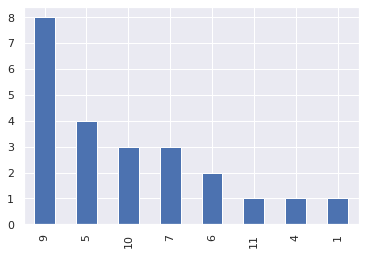

In [ ]:
kathimerini['month'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


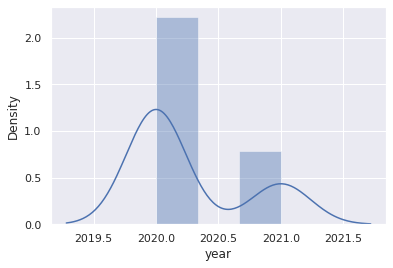

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()


sns.distplot(kathimerini['year'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


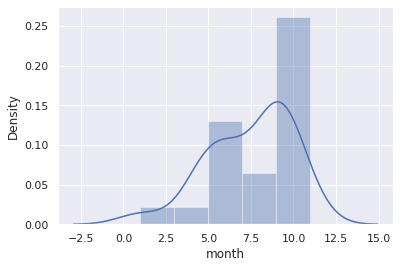

In [ ]:
sns.distplot(kathimerini['month'])

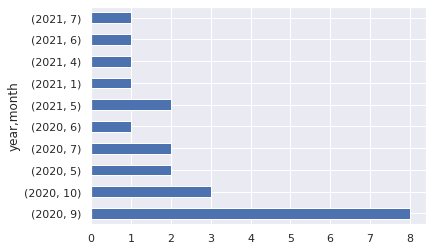

In [ ]:
kathimerini.groupby('year')["month"].value_counts().groupby(level=0).head(5).plot(kind='barh')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
kathimerini.to_csv("kathimerini.csv", index=False)

In [ ]:
kathimerini.to_excel('kathimerini.xls', index=False)

Heatmap

In [ ]:
data_url = 'kathimerini.csv'
gapminder = pd.read_csv(data_url)
print(gapminder.head(6))

                                            headline  ... day
0  Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...  ...   6
1  Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...  ...  22
2  Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...  ...  28
3  Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...  ...  28
4  Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...  ...   8
5  Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...  ...  27

[6 rows x 8 columns]


In [ ]:
df1 = gapminder[['year', 'month', 'day']]
print(df1.head(3))

   year  month  day
0  2021      7    6
1  2021      6   22
2  2021      5   28


In [ ]:
heatmap1_data = pd.pivot_table(df1, values='year', 
                     index=['day'], 
                     columns='month')

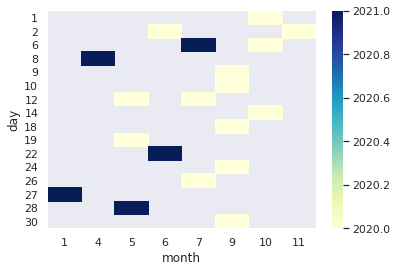

In [ ]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def load_kathimerini():
    return pd.read_csv("kathimerini.csv", delimiter="\t")

data = load_kathimerini()
kathimerini = kathimerini["fulltext"]
print(kathimerini)

0     Θετική εισήγηση για τον εμβολιασμό κατά της co...
1     Το Αμπντάλα το ένα από τα υποψήφια εμβόλια κατ...
2     Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...
3     Πώς ακριβώς λειτουργεί το ευρωπαϊκό «Ψηφιακό Π...
4     Ο Βασίλης Σεβαστής δεν κατάφερε να βγει νικητή...
5     Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...
6     Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...
7     Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...
8     To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...
9     Η εμφάνιση του Covid19 και τα αναγκαία για τον...
10    Από την πρώτη του εμφάνιση σε μία υπαίθρια αγο...
11    Η πανδημία του Covid19 έφερε ανατροπές στην κα...
12    Οι εντεινόμενες ανησυχίες για τις οικονομικές ...
13    Στροφή στην τηλεργασία όπου αυτό ήταν εφικτό α...
14    Την ανάγκη να χορηγηθούν επιπλέον 35 δισ δολάρ...
15    Από την πρώτη στιγμή που ο ΠΟΥ κήρυξε παγκόσμι...
16    Την ώρα που οι οικονομίες βυθίζονται στην ύφεσ...
17    Η αναστολή των δοκιμών του εμβολίου από τη

In [ ]:
kathimerini_lower = list(map(lambda x:x.lower(),kathimerini))
print (kathimerini_lower)

['θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατε

In [ ]:
import re

kathimerini_as_string = ''.join(kathimerini_lower)

rt_regex = re.sub('rt @', " ", kathimerini_as_string)
rt_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [ ]:
usernames_regex = re.sub(r"@[^ \.]+", " ", rt_regex)
usernames_regex


'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [ ]:
#diagrafi hashtags
hashtags_regex = re.sub(r"#[^ \.]+"," ",usernames_regex)
hashtags_regex


'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [ ]:
#diagrafi links
links_regex = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", hashtags_regex)
links_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [ ]:
# diagrafi\n\n 

new_lines_regex = re.sub('\n\n', " ", links_regex)
new_lines_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [ ]:
# diagrafi &amp;

amp_regex = re.sub('&amp;', " ", new_lines_regex)
amp_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [ ]:
#Wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
list(STOPWORDS)[0:20]

["i'll",
 'each',
 "that's",
 'being',
 'were',
 'from',
 "i've",
 'theirs',
 'such',
 'into',
 'we',
 'than',
 'doing',
 'on',
 "they'll",
 "don't",
 'k',
 'most',
 'themselves',
 "what's"]

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_sm
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load("el_core_news_sm")

In [ ]:
nlp_en=spacy.load('en_core_web_sm')

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
english_stopwords=list(STOP_WORDS)

print(english_stopwords)

['keep', 'across', 'doing', 'three', 'most', '’re', 'in', 'me', 'made', 'whereas', 'full', 'two', 'thereupon', 'hundred', 'am', '’d', 'n’t', 'same', 'as', 'beside', 'her', 'put', 'so', 'anyone', 'at', 'us', 'side', 'toward', 'over', 'does', 'might', 'out', 'fifteen', 'done', 'yourselves', 'enough', 'six', 'front', 'thus', 'top', 'while', 'therefore', 'thru', 'along', 'when', 'get', 'i', 'towards', 'seem', 'seems', 'yet', 'within', 'again', 'above', 'became', 'twenty', 'former', 'using', 'behind', 'your', 'amount', 'since', 'around', 'wherein', 'with', 'nothing', '’m', 'be', 'then', 'call', 'amongst', 'several', 'being', 'another', 'into', 'much', 'we', 'next', 'already', 'therein', 'everyone', 'how', 'give', 'must', 'its', 'hereupon', 'take', "n't", 'five', 'beyond', 'perhaps', "'ll", 'under', 'whole', 'himself', 'back', 'them', '’ve', 'due', 'hereafter', 'off', 'myself', 'bottom', 'through', 'seeming', 'twelve', 'whenever', 'nowhere', 'whether', 'somewhere', 'still', 'see', 'itself', 

In [ ]:
list(nlp.Defaults.stop_words)[0:1500]

['πίσω',
 'ετέρα',
 'έτερον',
 'τούτου',
 'προτού',
 'άλλα',
 'στον',
 'καμίαν',
 'ούτε',
 'σας',
 'τις',
 'τώρα',
 'ετούτες',
 'κάμποσα',
 'τρεις',
 'όλη',
 'είτε',
 'έχοντας',
 'είσαι',
 'ι',
 'όσο',
 'κάποιον',
 'τέτοιες',
 'ειδεμή',
 'κανέναν',
 'κάτι',
 'τέτοιαν',
 'είμαι',
 'τέτοιο',
 'πόσους',
 'ως',
 'κάποιοι',
 'αφού',
 'μόνες',
 'αντί',
 'ολόγυρα',
 'μάλλον',
 'ίδιαν',
 'άλλοι',
 'έκαστοι',
 'κάμποσου',
 'αυτές',
 'όλος',
 'ναι',
 'μεν',
 'οποιοσδήποτε',
 'γιατί',
 'μέχρι',
 'δικά',
 'πέρσι',
 'όχι',
 'σε',
 'του',
 'συχνή',
 'ήσασταν',
 'όσος',
 'οποιανδήποτε',
 'είθε',
 'έχω',
 'οσοδήποτε',
 'ο',
 'ίσια',
 'αυτής',
 'πάρα',
 'να',
 'ετούτο',
 'μήτε',
 'ίδιους',
 'συχνοί',
 'σου',
 'αυτών',
 'εμένα',
 'ετούτης',
 'άλλοτε',
 'αντίς',
 'πολλά',
 'πάντοτε',
 'κάποιος',
 'στην',
 'έκαστης',
 'έτεροι',
 'μακάρι',
 'πρόκειται',
 'τέτοιου',
 'εμείς',
 'τοι',
 'εαυτόν',
 'αν',
 'όποιος',
 'εφεξής',
 'κάμποσων',
 'οποιοδηήποτε',
 'είχα',
 'εκάστων',
 'συγχρόνως',
 'μακρυά',
 'εσύ',
 

In [ ]:
def remove_punctuation(text):
	dict = {
			u"'": "",
      u"&": "",
      u"(": "",
      u")": "",
      u"2": "",
			"'": "",
			u",": "",
			",": "",
			u".": "",
			".": "",
			u"``": "",
			"``": "",
			u"''": "",
			"''": "",
			u'"': "",
			'"': "",
			u"[":"",
			"[":"",
			u"]":"",
			"]":"",
			u">": "",
			">": "",
			u"<": "",
			"<": "",
			u";": "",
			";": "",
			u"·": "",
			'·': "",
			u"‘": "",
			"‘": "",
			u"’": "",
			"’": "",
			"–": "",
			u"–": "",
      "και":"",
      ":":"",
      "!":"",
      u";":"",
      "»":"",
      "«":"",
      "%":"",
      " ή ":"",
      " κ ":"",
      " συμπληρώστε ":"",
      " λαμβάνετε ":"",
      " επιθυμείτε ":"",
      " email ":"",
      " newsletter ":"",
      " εκδόσεισμονοπροσωπηαε ":"",
      " 2021poweredby ":"",
      " 2021poweredbyσυμπληρωστε": "",
      " παρακαλούμε ":"",
      " υγείας ":"",
      " ενημερωτικά ":"",
      " wwwkathimerinigr ":"",
      " τν ":"",
      " στν ":"",
      " wwwkathimerinigrγια ": "",
      " λαμβάνωμνύματα ": "",
      " εκδόσεις ": "",
      " τς ":"",
      " παρακαλούμετoσαςemail ": "",
      " προσωπικών ": "",
      " δεδομένων ": "",
      " τοναnewsletter ": "",
      " αννατοτουεπιλέξτεπρώτα ": "",
      " παρακαλούμετοσαςemail ": "",
      " παρακάτω ": "",
      " πατώντας ": "",
      " κουμπί ": "",
      " τουακολουθώντας ": "",
      " επιλέξτε ": "",
      " διαγραφείτε ": "",
      " λαμβάνω ": "",
      " λαμβάνω ": "",
      " παρακαλούμε ": "",
      " λαμβάνω ": "",
      " ολοκληρώστε ": "",
      " λαμβάνω ": "",
      " διαγραφείτε ": "",
      " διαχειριστή ": "",
      " μονοπροσωπη ": "",
      " το ": "",
      " πεδίο ": "",
      " παρακαλούμε ": "",
      " email ": "",
      " επιλέξτε ": "",
      " πρώτα ": "",
      " www ": "",
      " kathimerini ": "",
      " gr ": "",
      " εκδόσεισ ": "",

			}
	regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))
	return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)


In [ ]:
final_text=remove_punctuation(amp_regex)

In [ ]:
gr_stopwords=list(nlp.Defaults.stop_words)
final_stopwords=gr_stopwords+ english_stopwords

In [ ]:
wordcloud = WordCloud(
    stopwords = final_stopwords,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap="Blues"
 ).generate(final_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
tweets_tokens = word_tokenize(final_text)
tokens_without_sw = [word for word in tweets_tokens if not word in final_stopwords]

print(tokens_without_sw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['θετική', 'εισήγηση', 'εμβολιασμό', 'covid-19', 'εφήβων', '1-15', 'ετών', 'έδωσεανώτατο', 'συμβούλιοτου', 'βελγίου', 'προτείνοντας', 'εμβολιασμό', 'ευπαθών', 'εφήβωνόσων', 'βρίσκονται', 'άτομα', 'ευάλωταόπως', 'αναφέρει', 'σημερινό', 'πρωτοσέλιδο', 'δημοσίευμα', 'γαλλόφωνης', 'εφημερίδας', 'le', 'soirβέλγιο', 'επιμένει', 'συντονισμένη', 'ελεύθερη', 'επιλογή', 'αφορά', 'εμβολιασμό', 'εφήβων', 'αντίθεση', 'χώρες', 'γαλλίατο', 'ισραήλβέλγιο', 'εμβολιάζει', 'συστηματικά', 'εφήβους', 'ηλικίας', '1-15', 'ετών', 'ανώτατο', 'συμβούλιοcss', 'υποβάλλει', 'γνωμοδότησή', 'σήμερααπόγευμα', 'αρμόδιες', 'αρχές', 'επισημαίνει', 'συγκεκριμένες', 'καταστάσεις', 'συνιστάται', 'εμβολιασμός', 'νέων', 'εφήβων', 'παιδιά', 'συν-νοσογόνους', 'παράγοντες', 'λευχαιμία', 'χρόνιες', 'παθήσεις', 'νεφρώντου', 'ήπατος', 'σύνδρομο', 'έμμεση', 'προστασία', 'ευάλωτων', 'συγγενών', 'παππούδες', 'γονείς', 'αδέλφια', 

[('καθημερινες', 42), ('νέα', 33), ('νέο', 33), ('περισσότερες', 26), ('βρίσκεται', 25), ('πληροφορίες', 25), ('προϊόντα', 23), ('μέρος', 23), ('τέλος', 22), ('οδό', 22), ('στιγμή', 22), ('λίστα', 22), ('σχέση', 22), ('εκδοσεισμονοπροσωπηαε', 21), ('©', 21), ('014', 21)]


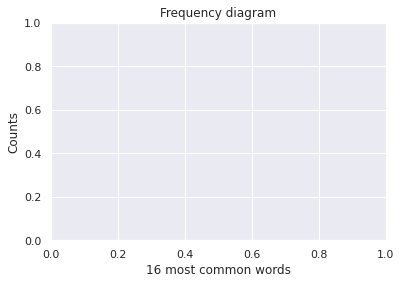

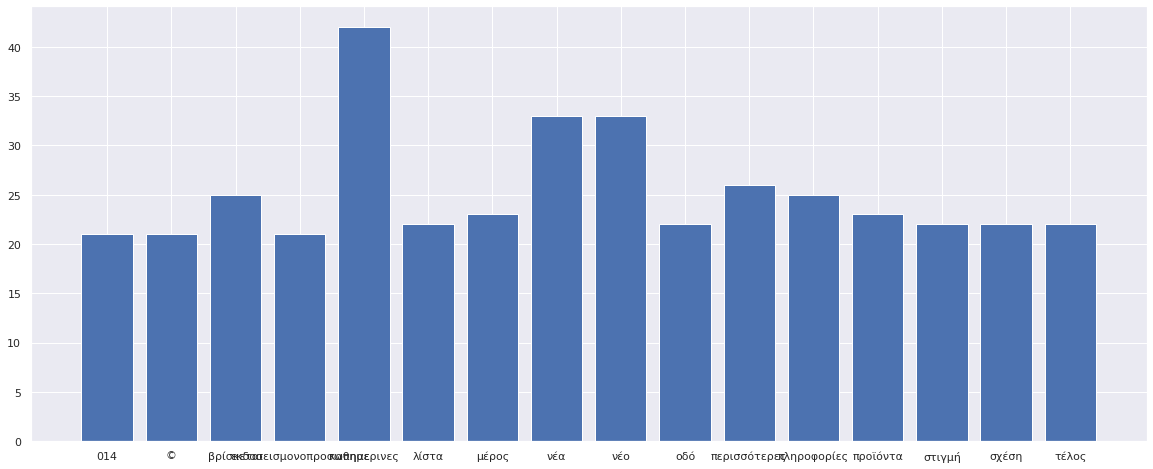

None


In [ ]:
from collections import Counter

most_frequent = Counter(tokens_without_sw).most_common(16)
print(most_frequent) 

def plot_most_frequent(frequent):
    frequent = sorted(frequent, key=lambda pair: pair[0], reverse=False)
    x = list(map(lambda h: h[0], frequent))
    y = list(map(lambda h: h[1], frequent)) 
    
    plt.title("Frequency diagram")
    plt.xlabel("16 most common words")
    plt.ylabel("Counts")
    plt.figure(figsize=(20,8))

    plt.bar(x, y)
    plt.show()
    
print(plot_most_frequent(most_frequent[:16]))

In [410]:
#analysi sunaisthimatos
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [411]:
kathimerini = '/content/kathimerini.csv'
kathimerini = pd.read_csv(kathimerini)

In [412]:
kathimerini

,headline,summary,link,releasedate
0,Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...,Θετική εισήγηση για τον εμβολιασμό κατά της co...,https://www.kathimerini.gr/world/561423979/vel...,2021-07-06 15:31:00
1,"Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...","Το Αμπντάλα, το ένα από τα υποψήφια εμβόλια κα...",https://www.kathimerini.gr/world/561406834/emv...,2021-06-22 07:49:00
2,Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...,Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...,https://www.kathimerini.gr/society/561380464/p...,2021-05-28 21:54:00
3,Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...,Το «EU digital Covid certificate» θα εκδίδεται...,https://www.kathimerini.gr/society/561379552/p...,2021-05-28 12:25:00
4,Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...,Πέθανε από COVID19 ο παλαιός πρωταθλητής και «...,https://www.kathimerini.gr/society/561323353/v...,2021-04-08 17:05:00
5,Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...,Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...,https://www.kathimerini.gr/economy/561242983/e...,2021-01-27 10:49:00
6,Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...,Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...,https://www.kathimerini.gr/society/561141022/l...,2020-11-02 17:21:00
7,Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...,Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...,https://www.kathimerini.gr/world/561116779/sto...,2020-10-14 16:04:00
8,Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...,To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...,https://www.kathimerini.gr/world/561106261/eyr...,2020-10-06 15:32:00
9,Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.,Η εμφάνιση του Covid19 και τα αναγκαία για τον...,https://www.kathimerini.gr/economy/561100033/t...,2020-10-01 13:03:00


In [413]:
kathimerini['releasedate'] =  pd.to_datetime(kathimerini['releasedate'] )

In [414]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [415]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [416]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [417]:
emolex_df.tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [418]:
kathimerini

,headline,summary,link,releasedate
0,Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...,Θετική εισήγηση για τον εμβολιασμό κατά της co...,https://www.kathimerini.gr/world/561423979/vel...,2021-07-06 15:31:00
1,"Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...","Το Αμπντάλα, το ένα από τα υποψήφια εμβόλια κα...",https://www.kathimerini.gr/world/561406834/emv...,2021-06-22 07:49:00
2,Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...,Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...,https://www.kathimerini.gr/society/561380464/p...,2021-05-28 21:54:00
3,Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...,Το «EU digital Covid certificate» θα εκδίδεται...,https://www.kathimerini.gr/society/561379552/p...,2021-05-28 12:25:00
4,Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...,Πέθανε από COVID19 ο παλαιός πρωταθλητής και «...,https://www.kathimerini.gr/society/561323353/v...,2021-04-08 17:05:00
5,Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...,Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...,https://www.kathimerini.gr/economy/561242983/e...,2021-01-27 10:49:00
6,Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...,Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...,https://www.kathimerini.gr/society/561141022/l...,2020-11-02 17:21:00
7,Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...,Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...,https://www.kathimerini.gr/world/561116779/sto...,2020-10-14 16:04:00
8,Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...,To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...,https://www.kathimerini.gr/world/561106261/eyr...,2020-10-06 15:32:00
9,Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.,Η εμφάνιση του Covid19 και τα αναγκαία για τον...,https://www.kathimerini.gr/economy/561100033/t...,2020-10-01 13:03:00


In [419]:
len(kathimerini)

23

In [420]:
emolex_df['word'].head(10)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
5              ορμος
6               υδρα
7       αγια τραπεζα
8               αμην
9             απατσι
Name: word, dtype: object

In [421]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [422]:
from sklearn.feature_extraction.text import TfidfVectorizer
CountVectorizer(stop_words=final_stopwords, binary=True)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['πίσω', 'ετέρα', 'έτερον', 'τούτου', 'προτού',
                            'άλλα', 'στον', 'καμίαν', 'ούτε', 'σας', 'τις',
                            'τώρα', 'ετούτες', 'κάμποσα', 'τρεις', 'όλη',
                            'είτε', 'έχοντας', 'είσαι', 'ι', 'όσο', 'κάποιον',
                            'τέτοιες', 'ειδεμή', 'κανέναν', 'κάτι', 'τέτοιαν',
                            'είμαι', 'τέτοιο', 'πόσους', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [423]:
matrix = vec.fit_transform(kathimerini['summary'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [424]:
import pandas as pd
pd.DataFrame(matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,13121,13122,13123,13124,13125,13126,13127,13128,13129,13130,13131,13132,13133,13134,13135,13136,13137,13138,13139,13140,13141,13142,13143,13144,13145,13146,13147,13148,13149,13150,13151,13152,13153,13154,13155,13156,13157,13158,13159,13160
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [425]:
vec.get_feature_names()

['αφεση',
 'ενορκη βεβαιωση',
 'εχοντας',
 'εχω',
 'οριο',
 'ορμος',
 'υδρα',
 'αγια τραπεζα',
 'αμην',
 'απατσι',
 'αυτοκινητοδρομος',
 'αυγουστος',
 'βερολινο',
 'βικτωρια',
 'βοστωνη',
 'γαμηλιο ταξιδι',
 'γεννηση παιδιου',
 'γαιδαρος',
 'γατα',
 'γερμανος',
 'γιαννης',
 'γνωστοποιηση',
 'γυαλια',
 'διακοπη',
 'διευθυντρια σχολειου',
 'διδυμοι',
 'δεξαμενη',
 'δευτερα παρουσια',
 'δευτερον',
 'δημοκρατια',
 'διαρκεια ζωης',
 'διαδρομη',
 'διαλογισμος',
 'διεθνες',
 'διευθυνσεις',
 'δραμα',
 'εξαρτηση',
 'εξωτερικου χωρου',
 'επικοινωνω',
 'επιπτωσεις',
 'επιστροφη',
 'εργαστηρι',
 'εγγραφειτε',
 'εκδηλωση',
 'εκθεση ιδεων',
 'εκκλησια',
 'εν τω μεταξυ',
 'ενταση ηχου',
 'επικολληση',
 'εποπτης',
 'εταιρια',
 'ευαγγελιο',
 'ευαγγελιστης',
 'ευθυνη',
 'ευρετηριο',
 'ευφραδεια',
 'ζητω',
 'ιαπωνια',
 'κυκλος μαθηματων',
 'καντερμπιουρι',
 'κινα',
 'κολλεγιο',
 'κορσικανος',
 'κτιριο',
 'κυριολεκτικα',
 'κυριε',
 'κυστη',
 'λευκα ειδη',
 'λιστα ελεγχου',
 'λυρικη σκηνη',
 'λεσχη',
 'λεπ

In [426]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [427]:
kathimerini['anger'] = wordcount_df[angry_words].sum(axis=1)

kathimerini['positivity'] = wordcount_df[positive_words].sum(axis=1)


kathimerini['joy'] = wordcount_df[joy_words].sum(axis=1)


kathimerini['disgust'] = wordcount_df[disgust_words].sum(axis=1)



kathimerini['surprise'] = wordcount_df[surprise_words].sum(axis=1)

kathimerini['trust'] = wordcount_df[trust_words].sum(axis=1)


kathimerini['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


kathimerini['sadness'] = wordcount_df[sadness_words].sum(axis=1)

kathimerini['negative'] = wordcount_df[negative_words].sum(axis=1)

kathimerini['fear'] = wordcount_df[fear_words].sum(axis=1)

In [428]:
kathimerini.set_index('releasedate' , inplace=True)

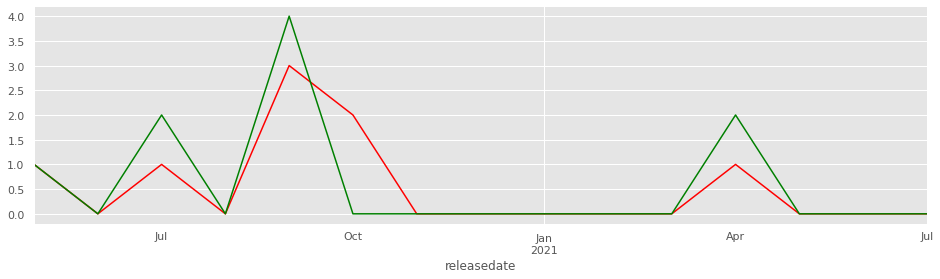

In [429]:
ax = kathimerini['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
kathimerini['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

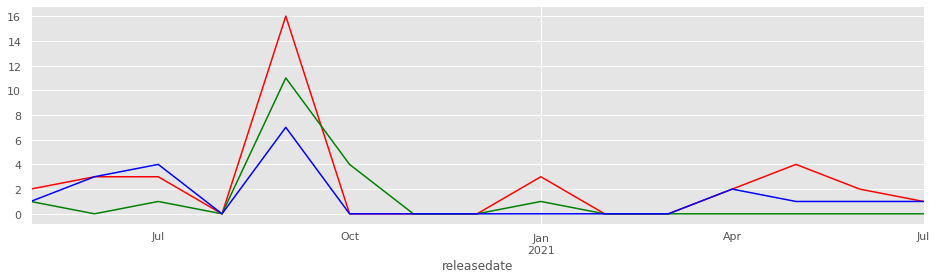

In [430]:
ax = kathimerini['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
kathimerini['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
kathimerini['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [431]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

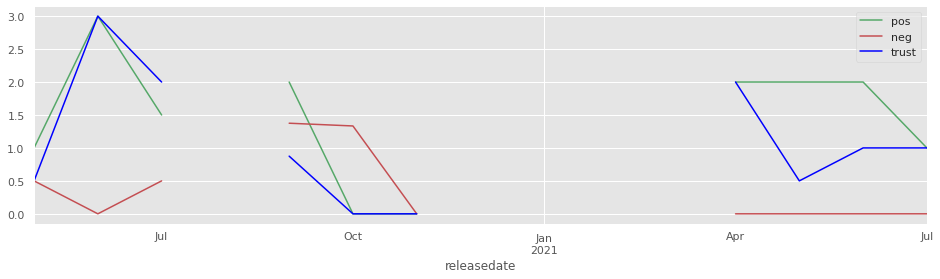

In [432]:
ax = kathimerini['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
kathimerini['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
kathimerini['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()